In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import torch
import torch.nn as nn
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
import gdown

gdown.download_folder('https://drive.google.com/drive/folders/1UKUZZ6uTdEVdGWEKNh0ZRp08pK_AVnrm', output='Download')

Retrieving folder contents


Processing file 1wHcBG5ScNKOxQixT6XZElaYYnLe5YtTh images.hdf5
Processing file 19NhzTlMREy2ct5kaXJyuZjSrgrSq2zIOMSiiTuGCPbI metadata
Processing file 1RZTnXKRaoVzszG8zQgBgmdnGyGXL_CO3rmbf3QpDNbU Problem Statement
Processing file 1N9oQCi5zklHrv-AXRF6RBiiAzmxc4i2y subject_data.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1wHcBG5ScNKOxQixT6XZElaYYnLe5YtTh
From (redirected): https://drive.google.com/uc?id=1wHcBG5ScNKOxQixT6XZElaYYnLe5YtTh&confirm=t&uuid=e861b2bb-8a46-4c49-913f-e379852a41e5
To: /content/Download/images.hdf5
100%|██████████| 1.30G/1.30G [00:09<00:00, 136MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=19NhzTlMREy2ct5kaXJyuZjSrgrSq2zIOMSiiTuGCPbI
From (redirected): https://docs.google.com/spreadsheets/d/19NhzTlMREy2ct5kaXJyuZjSrgrSq2zIOMSiiTuGCPbI/export?format=xlsx
To: /content/Download/metadata
52.7kB [00:00, 1.46MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1RZTnXKRaoVzszG8zQgBgmdnGyGXL_CO3rmbf3QpDNbU
From (redirected): https://docs.google.com/document/d/1RZTnXKRaoVzszG8zQgBgmdnGyGXL_CO3rmbf3QpDNbU/export?format=docx
To: /content/Download/Problem Statement
78.3kB [00:00, 1.31MB/s

['Download/images.hdf5',
 'Download/metadata',
 'Download/Problem Statement',
 'Download/subject_data.csv']

In [3]:
df = pd.read_csv('Download/subject_data.csv')
print(df)
df.columns

/tmp/ipython-input-2662961776.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Download/subject_data.csv')


             isic_id  target  patient_id  age_approx     sex  \
0       ISIC_0015670       0  IP_1235828        60.0    male   
1       ISIC_0015845       0  IP_8170065        60.0    male   
2       ISIC_0015864       0  IP_6724798        60.0    male   
3       ISIC_0015902       0  IP_4111386        65.0    male   
4       ISIC_0024200       0  IP_8313778        55.0    male   
...              ...     ...         ...         ...     ...   
401054  ISIC_9999937       0  IP_1140263        70.0    male   
401055  ISIC_9999951       0  IP_5678181        60.0    male   
401056  ISIC_9999960       0  IP_0076153        65.0  female   
401057  ISIC_9999964       0  IP_5231513        30.0  female   
401058  ISIC_9999967       0  IP_6426047        50.0    male   

       anatom_site_general  clin_size_long_diam_mm          image_type  \
0          lower extremity                    3.04  TBP tile: close-up   
1                head/neck                    1.10  TBP tile: close-up   
2        

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [ ]:
df.shape

In [4]:
diagnosis_and_target = [
    'target',
    'iddx_full',
    'iddx_1',
    'iddx_2',
    'iddx_3',
    'iddx_4',
    'iddx_5',
    'mel_mitotic_index',
    'mel_thick_mm',
]

patient_info = [
    'patient_id',
    'age_approx',
    'sex',
    'anatom_site_general',
    'tbp_lv_location',
    'tbp_lv_location_simple',
]

lesion_geometry = [
    'clin_size_long_diam_mm',
    'tbp_lv_areaMM2',
    'tbp_lv_perimeterMM',
    'tbp_lv_minorAxisMM',
    'tbp_lv_eccentricity',
    'tbp_lv_area_perim_ratio',
    'tbp_lv_norm_border',
    'tbp_lv_symm_2axis',
    'tbp_lv_symm_2axis_angle',
]

lesion_color_texture = [
    'tbp_lv_A',
    'tbp_lv_Aext',
    'tbp_lv_B',
    'tbp_lv_Bext',
    'tbp_lv_C',
    'tbp_lv_Cext',
    'tbp_lv_H',
    'tbp_lv_Hext',
    'tbp_lv_L',
    'tbp_lv_Lext',
    'tbp_lv_color_std_mean',
    'tbp_lv_deltaA',
    'tbp_lv_deltaB',
    'tbp_lv_deltaL',
    'tbp_lv_deltaLBnorm',
    'tbp_lv_norm_color',
    'tbp_lv_radial_color_std_max',
    'tbp_lv_stdL',
    'tbp_lv_stdLExt',
]

other_metadata = [
    'isic_id',
    'lesion_id',
    'tbp_lv_dnn_lesion_confidence',
    'tbp_lv_nevi_confidence',
    'image_type',
    'tbp_tile_type',
    'tbp_lv_x',
    'tbp_lv_y',
    'tbp_lv_z',
]

df[patient_info]
df[other_metadata]
df[lesion_color_texture]
df[lesion_geometry]
df[diagnosis_and_target]

,target,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm
0,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
401054,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
401055,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
401056,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
401057,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len((patient_info) +
(other_metadata) +
(lesion_color_texture) +
(lesion_geometry) +
(diagnosis_and_target))

In [65]:
iddx_columns = diagnosis_and_target[1:7]

for col in iddx_columns:
  print("Column:", col)
  print(df[col].value_counts())

Column: iddx_full
iddx_full
Benign                                                                                                                                                           399991
Benign::Benign melanocytic proliferations::Nevus::Nevus, Atypical, Dysplastic, or Clark                                                                             228
Benign::Benign melanocytic proliferations::Nevus                                                                                                                    141
Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Nodular                                             98
Indeterminate::Indeterminate melanocytic proliferations::Atypical melanocytic neoplasm                                                                               64
Benign::Benign epidermal proliferations::Seborrheic keratosis                                                                       

In [ ]:
df[diagnosis_and_target]

In [ ]:
(df['target'] == df['iddx_full']).sum()

In [ ]:
# tbp_lv_location provides much more information than any other location-based feature

print(df['tbp_lv_location'].unique())
print(df['tbp_lv_location_simple'].unique())
print(df['anatom_site_general'].unique())

In [ ]:
# unuseful_columns = ['image_type', 'tbp_lv_location_simple', 'anatom_site_general', 'patient_id', 'lesion_id']

df['tbp_tile_type'].value_counts()

In [ ]:
df.isna().sum()

In [5]:
median_age = df['age_approx'].median()
df['age_approx'].fillna(median_age, inplace=True)
df['sex'].fillna('unknown', inplace=True)

/tmp/ipython-input-1618488571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_approx'].fillna(median_age, inplace=True)
/tmp/ipython-input-1618488571.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
df['tbp_lv_x'].value_counts()

In [6]:
# !pip install h5py
import h5py
images_file = 'Download/images.hdf5'


images = h5py.File(images_file, 'r')
img_keys = list(images.keys())


def get_img(key):
  if key not in img_keys: return None
  return Image.open(io.BytesIO(images[key][()]))

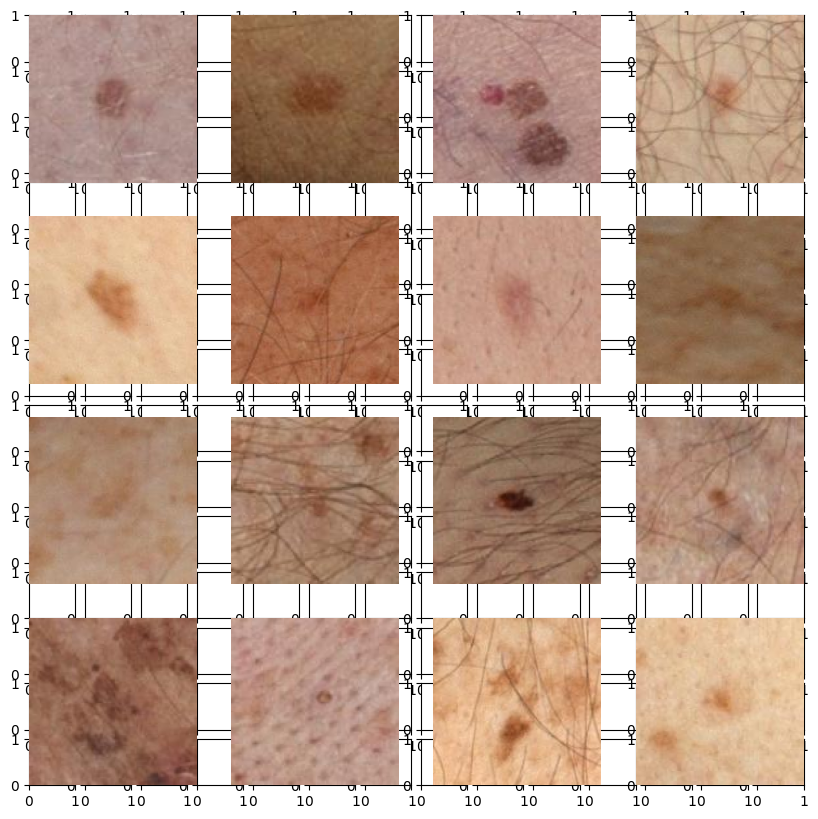

In [7]:
plt.subplots(14, 14, figsize=(10, 10))

for i in range(4):
  for j in range(4):
    plt.subplot(4, 4, 4*i+j+1)
    plt.imshow(get_img(np.random.choice(img_keys)))
    plt.axis('off')

plt.show()

In [8]:
patient_info = [
    'patient_id',
    'age_approx',
    'sex',
    'tbp_lv_location',
]

In [9]:
tabular_features = patient_info + lesion_geometry + lesion_color_texture

numerical_features = lesion_geometry + lesion_color_texture + ['age_approx']
categorical_features = ['sex', 'tbp_lv_location']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [23]:
tabular_data_preprocessed = preprocessor.fit_transform(df[numerical_features+categorical_features])
tabular_data_preprocessed.shape

(401059, 53)

In [11]:
# df[['iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5']] = df['iddx_full'].str.split('::', expand=True)
iddx_columns = ['iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5']

# NO

label_encoders = {}
labels_encoded = {}
for col in iddx_columns:
    df[col].fillna('Missing', inplace=True)
    labels_encoded[col], label_encoders[col] = pd.factorize(df[col])

# image_data = np.random.rand(df.shape[0], 139, 139, 3) # Example placeholder

# X_tab_train, X_tab_val, X_img_train, X_img_val, y_train_full, y_val_full = train_test_split(
#     tabular_data_preprocessed,
#     image_data,
#     df[iddx_columns],
#     test_size=0.2,
#     random_state=42
# )

# y_train = {col: labels_encoded[col][y_train_full.index] for col in iddx_columns}
# y_val = {col: labels_encoded[col][y_val_full.index] for col in iddx_columns}

/tmp/ipython-input-1404314116.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Missing', inplace=True)
/tmp/ipython-input-1404314116.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [12]:
!pip install hiclass

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.5 MB/s eta 0:00:00


Now that `hiclass` is installed, you can use a hierarchical classifier. For this, we need to format the labels correctly for `hiclass` and choose a classifier. We'll use a simple `BalancedRandomForestClassifier` from `hiclass` as an example, but you can explore other options in the library.

In [24]:
X_tab_train, X_tab_val, y_train_full, y_val_full = train_test_split(
    tabular_data_preprocessed,
    df[iddx_columns],
    test_size=0.2,
    random_state=42
)

In [28]:
y_train_full

,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5
18085,Benign,Missing,Missing,Missing,Missing
171181,Benign,Missing,Missing,Missing,Missing
284095,Benign,Missing,Missing,Missing,Missing
354900,Benign,Missing,Missing,Missing,Missing
77679,Benign,Missing,Missing,Missing,Missing
...,...,...,...,...,...
259178,Benign,Missing,Missing,Missing,Missing
365838,Benign,Missing,Missing,Missing,Missing
131932,Benign,Missing,Missing,Missing,Missing
146867,Benign,Missing,Missing,Missing,Missing


In [29]:
# from hiclass import LocalClassifierPerNode
# from sklearn.ensemble import RandomForestClassifier
from hiclass import LocalClassifierPerNode
import numpy as np
# Import XGBoost classifier
from xgboost import XGBClassifier
import pandas as pd

class_counts = df['iddx_1'].value_counts()
total_samples = len(df)
class_weights = {cls: total_samples / (len(class_counts) * count) for cls, count in class_counts.items()}

sample_weights = np.array([class_weights[label[0]] for label in y_train_hiclass[X_tab_train.index]])


hclf = LocalClassifierPerNode(local_classifier=XGBClassifier(random_state=42, tree_method='hist'))

INFO:LCPN:Creating digraph from 320847 2D labels
INFO:LCPN:Detected 3 roots
INFO:LCPN:Initializing local classifiers
INFO:LCPN:Initializing siblings binary policy
INFO:LCPN:Fitting local classifiers
INFO:LCPN:fitting node 1/144: Benign
INFO:LCPN:Training local classifier Benign
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:726: FutureWarning: Pass `sample_weight` as keyword args.
  warnings.warn(msg, FutureWarning)
INFO:LCPN:fitting node 2/144: Benign::HiClass::Separator::Missing
INFO:LCPN:Training local classifier Benign::HiClass::Separator::Missing
INFO:LCPN:fitting node 3/144: Benign::HiClass::Separator::Missing::HiClass::Separator::Missing
INFO:LCPN:Training local classifier Benign::HiClass::Separator::Missing::HiClass::Separator::Missing
INFO:LCPN:adding constant classifier
INFO:LCPN:fitting node 4/144: Benign::HiClass::Separator::Missing::HiClass::Separator::Missing::HiClass::Separator::Missing
INFO:LCPN:Training local classifier Benign::HiClass::Separator::Missing::HiC

LocalClassifierPerNode(local_classifier=XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      feature_weights=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...),
                       verbose=5)

In [ ]:
hclf.fit(X_tab_train, y_train_hiclass[X_tab_train.index], sample_weight=sample_weights)


In [31]:
predict = hclf.predict(X_tab_val)

INFO:LCPN:Predicting
INFO:LCPN:Predicting for node 'Benign'
INFO:LCPN:Predicting for node 'Malignant'
INFO:LCPN:Predicting for node 'Indeterminate'
INFO:LCPN:Predicting for node 'Missing'
INFO:LCPN:Predicting for node 'Benign melanocytic proliferations'
INFO:LCPN:Predicting for node 'Benign epidermal proliferations'
INFO:LCPN:Predicting for node 'Inflammatory or infectious diseases'
INFO:LCPN:Predicting for node 'Flat melanotic pigmentations - not melanocytic nevus'
INFO:LCPN:Predicting for node 'Benign soft tissue proliferations - Fibro-histiocytic'
INFO:LCPN:Predicting for node 'Benign adnexal epithelial proliferations - Follicular'
INFO:LCPN:Predicting for node 'Cysts'
INFO:LCPN:Predicting for node 'Benign soft tissue proliferations - Vascular'
INFO:LCPN:Predicting for node 'Malignant adnexal epithelial proliferations - Follicular'
INFO:LCPN:Predicting for node 'Malignant melanocytic proliferations (Melanoma)'
INFO:LCPN:Predicting for node 'Malignant epidermal proliferations'
INFO:L

In [35]:
(predict == y_val_full).sum() / len(predict)

,0
iddx_1,0.998841
iddx_2,0.997182
iddx_3,0.997195
iddx_4,0.998367
iddx_5,1.000000


In [45]:
df.loc[non_benign_y_val.index]

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
254676,ISIC_6396067,1,IP_4849578,50.0,female,lower extremity,5.80,TBP tile: close-up,3D: XP,15.134991,...,IL_6744326,Malignant::Malignant melanocytic proliferation...,Malignant,Malignant melanocytic proliferations (Melanoma),Melanoma in situ,"Melanoma in situ, associated with a nevus",Missing,NaN,NaN,99.757868
157629,ISIC_3983516,0,IP_1092190,65.0,female,lower extremity,9.37,TBP tile: close-up,3D: XP,26.635063,...,IL_8187337,Indeterminate::Indeterminate epidermal prolife...,Indeterminate,Indeterminate epidermal proliferations,Solar or actinic keratosis,Missing,Missing,NaN,NaN,99.760062
182742,ISIC_4603466,1,IP_0321326,70.0,male,posterior torso,1.71,TBP tile: close-up,3D: white,17.291312,...,IL_3107859,Malignant::Malignant epidermal proliferations:...,Malignant,Malignant epidermal proliferations,Squamous cell carcinoma in situ,Missing,Missing,NaN,NaN,0.571295
264642,ISIC_6634748,0,IP_7272992,70.0,male,posterior torso,9.53,TBP tile: close-up,3D: white,17.132380,...,IL_8549309,Indeterminate::Indeterminate melanocytic proli...,Indeterminate,Indeterminate melanocytic proliferations,Atypical intraepithelial melanocytic prolifera...,Missing,Missing,NaN,NaN,99.999310
64405,ISIC_1662809,1,IP_6611217,55.0,male,anterior torso,4.21,TBP tile: close-up,3D: XP,16.462690,...,IL_2419313,Malignant::Malignant melanocytic proliferation...,Malignant,Malignant melanocytic proliferations (Melanoma),Melanoma in situ,Missing,Missing,NaN,NaN,99.999950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309895,ISIC_7748442,1,IP_0273153,50.0,male,posterior torso,12.99,TBP tile: close-up,3D: white,23.624998,...,IL_7839651,Malignant::Malignant adnexal epithelial prolif...,Malignant,Malignant adnexal epithelial proliferations - ...,Basal cell carcinoma,"Basal cell carcinoma, Superficial",Missing,NaN,NaN,98.809820
95550,ISIC_2439617,1,IP_8977835,80.0,male,anterior torso,7.40,TBP tile: close-up,3D: white,21.430380,...,IL_9821674,Malignant::Malignant melanocytic proliferation...,Malignant,Malignant melanocytic proliferations (Melanoma),Melanoma in situ,"Melanoma in situ, Lentigo maligna type",Missing,NaN,NaN,99.999960
29189,ISIC_0790835,0,IP_9558858,40.0,male,posterior torso,7.02,TBP tile: close-up,3D: XP,20.650880,...,IL_6904515,Indeterminate::Indeterminate melanocytic proli...,Indeterminate,Indeterminate melanocytic proliferations,Atypical melanocytic neoplasm,Missing,Missing,NaN,NaN,100.000000
370640,ISIC_9244181,0,IP_1117889,55.0,female,posterior torso,10.16,TBP tile: close-up,3D: XP,15.864241,...,IL_4741067,Indeterminate::Indeterminate melanocytic proli...,Indeterminate,Indeterminate melanocytic proliferations,Atypical melanocytic neoplasm,Missing,Missing,NaN,NaN,15.604521


In [41]:
non_benign_X_val = X_tab_val[y_val_full['iddx_1'] != 'Benign']
non_benign_y_val = y_val_full[y_val_full['iddx_1'] != 'Benign']

(hclf.predict(non_benign_X_val) == non_benign_y_val).sum() / len(non_benign_X_val)

INFO:LCPN:Predicting
INFO:LCPN:Predicting for node 'Benign'
INFO:LCPN:Predicting for node 'Malignant'
INFO:LCPN:Predicting for node 'Indeterminate'
INFO:LCPN:Predicting for node 'Missing'
INFO:LCPN:Predicting for node 'Benign melanocytic proliferations'
INFO:LCPN:Predicting for node 'Benign epidermal proliferations'
INFO:LCPN:Predicting for node 'Inflammatory or infectious diseases'
INFO:LCPN:Predicting for node 'Flat melanotic pigmentations - not melanocytic nevus'
INFO:LCPN:Predicting for node 'Benign soft tissue proliferations - Fibro-histiocytic'
INFO:LCPN:Predicting for node 'Benign adnexal epithelial proliferations - Follicular'
INFO:LCPN:Predicting for node 'Cysts'
INFO:LCPN:Predicting for node 'Benign soft tissue proliferations - Vascular'
INFO:LCPN:Predicting for node 'Malignant adnexal epithelial proliferations - Follicular'
INFO:LCPN:Predicting for node 'Malignant melanocytic proliferations (Melanoma)'
INFO:LCPN:Predicting for node 'Malignant epidermal proliferations'
INFO:L

,0
iddx_1,0.021277
iddx_2,0.021277
iddx_3,0.021277
iddx_4,0.446809
iddx_5,1.000000


In [46]:
import pickle

filename = 'hclf_model.pkl'

with open(filename, 'wb') as f:
    pickle.dump(hclf, f)